In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sequencer import *
import time

init_sequencer()

MUPPET1_SEQUENCER_TEST
SPI access okay


In [2]:
# this clears the working memory for pulses
clear_pulses()
set_cycle_period("100m")

program_sequencer()

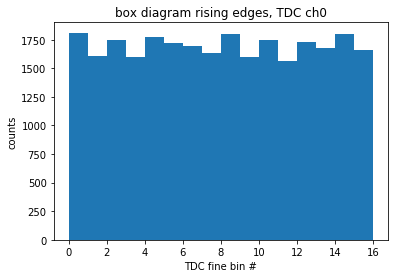

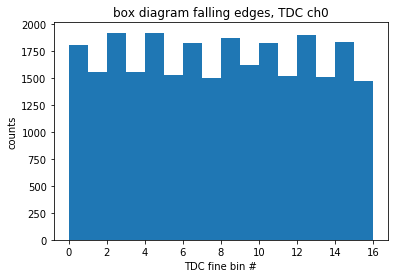

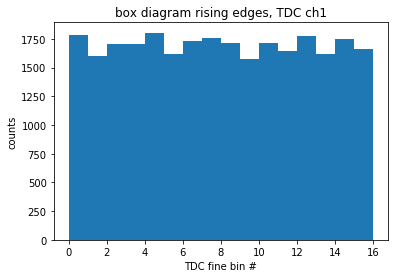

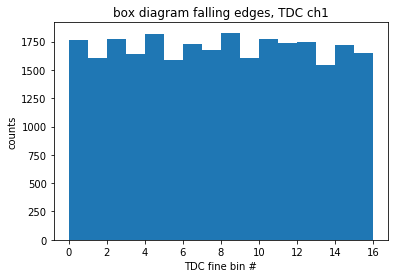

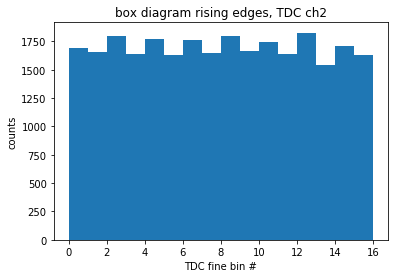

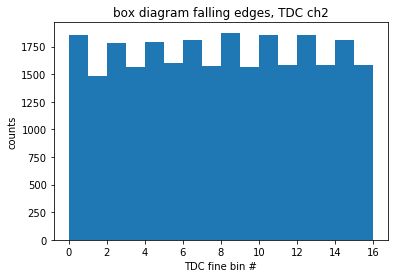

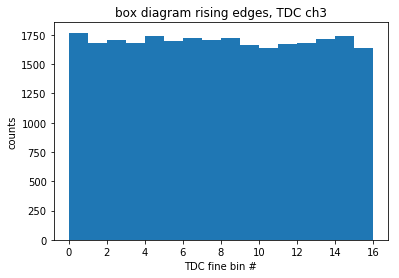

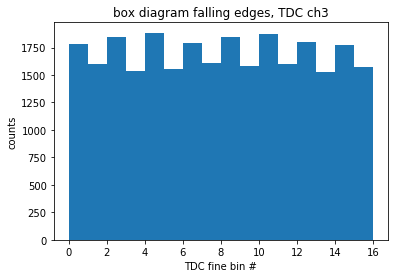

In [3]:
for ch in range(4):
    enable_tdc_chan(ch)
    
    reset_tdc()
    
    block = []
    enable_test_pulser(ch)
    
    
    # acquire statistics - do n block reads
    
    for i in range(20):
    
        enable_tdc()
        time.sleep(0.01)
        disable_tdc()
        
        
        start = time.time()
        block += slurp_fifo(ch)
        end = time.time()
        #print("acquired {} words of data from fifo".format(len(block)))
        #print("data transfer took {:3.1f} us".format((end - start)*1e6))
    
    
    fine_times_r , fine_times_f = decode_block_to_box_diagrams(block)
    
    plt.hist(fine_times_r,bins=range(0,17))
    plt.title("box diagram rising edges, TDC ch{}".format(ch))
    plt.xlabel("TDC fine bin #")
    plt.ylabel("counts")
    plt.show()
    plt.hist(fine_times_f,bins=range(0,17))
    plt.title("box diagram falling edges, TDC ch{}".format(ch))
    plt.xlabel("TDC fine bin #")
    plt.ylabel("counts")
    plt.show()